In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import networkx as nx

In [2]:
def parse_nodes_edge_file(filename):
    import networkx as nx
    import re
    
    # open the file
    with open(filename,'r') as f:
        lines = f.readlines()
    
    network = {}
    objects = []
    for i,line in enumerate(lines):
        line=line.strip()
        if line[:2] == '*v':
            continue
        elif line[:2] == '*e':
            network['nodes'] = objects
            objects = []
        else:
            objects.append(line)
    network['edges'] = objects 
    # print(network['edges'][:10])
    
    # Get the titles and nodes, and store them as a dict. The <title_dict> maps node # to 
    # node name (i.e. title of the movie).
    titles = [re.search(r'\s(.+)\s0.0 0.0 ellipse',x).group(1).replace('"','') for x in network['nodes']]
    nodes = [int(re.search(r'(\d+)',x).group(1)) for x in network['nodes']]
    title_dict = {}
    for n,title in zip(nodes,titles):
        title_dict[n] = title
       
    # Add the nodes (films)
    G = nx.Graph()
    for n in title_dict:
        G.add_node(title_dict[n])
    #print(title_dict)    
    
    # Add the edges (things in common between the films)
    for edge in network['edges']:
        e = edge.split()
        G.add_edge(title_dict[int(e[0])],title_dict[int(e[1])],weight=int(e[2]))
        
    #print(G["never die alone"]) # To get one node and its edges
    #print(G.edges(data=True)) # To get all of the edges and their attributes
    #nx.set_node_attributes(G, title_dict) # To add node attributes
    
    return G

# Exploratory - Genre Network

In [89]:
G_genre = parse_nodes_edge_file('GenreG.net')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


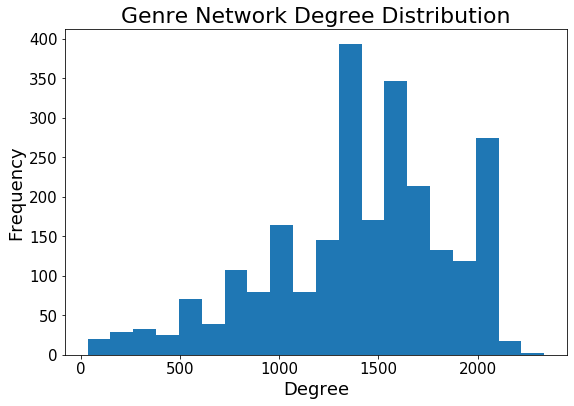

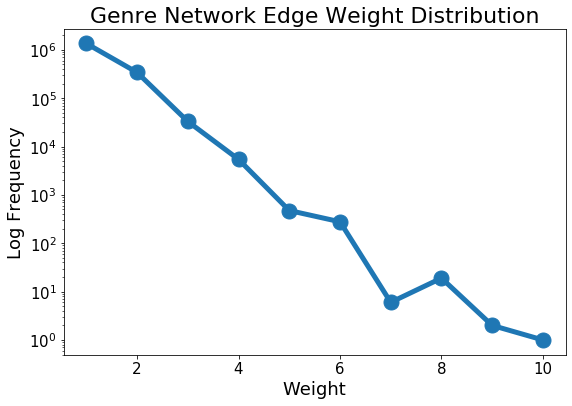

In [90]:
def create_degree_distro(G,bins,title='',weights=False):
    import matplotlib.pyplot as plt
    import numpy as np
    
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    fig = plt.figure(figsize=[9,6])
    ax = fig.add_subplot(111)
    ax.hist(degree_sequence,bins=bins)
    ax.set_title(f'{title} Degree Distribution',size=22)
    ax.set_ylabel('Frequency',size=18)
    ax.set_xlabel('Degree',size=18)
    ax.tick_params(labelsize=15)
    
    if weights:
        # Get all of the weights from this dataset:
        tedges = G.edges(data=True)
        all_w = [e[2]['weight'] for e in tedges]
        possible_ws = list(set(all_w))
        
        fig2 = plt.figure(figsize=[9,6])
        ax2 = fig2.add_subplot(111)
        
        h = [all_w.count(i) for i in possible_ws]
        print(possible_ws)
        ax2.plot(np.array(possible_ws),h,lw=5,marker='o',markersize=15)
        ax2.set_yscale('log')
        ax2.set_title(f'{title} Edge Weight Distribution',size=22)
        ax2.set_ylabel('Log Frequency',size=18)
        ax2.set_xlabel('Weight',size=18)
        ax2.tick_params(labelsize=15)        

create_degree_distro(G_genre,20,title='Genre Network',weights=True)

In [72]:
def graph_info(g):
        
    # Get number of connected components
    n_components = nx.number_connected_components(g)

    # Get the % of largest component
    gc = g.subgraph(max(nx.connected_components(g), key=len)).copy()
    num_nodes_largest_component = gc.number_of_nodes()
    percent_largest_component = gc.number_of_nodes()/g.number_of_nodes()
    
    print('Got the largest component...')

    # Get the diameter of the largest component
    diameter_largest_component = nx.diameter(gc)

    # Get the average shortest path lenth for the largest component
    average_shortest_path_largest_component = nx.average_shortest_path_length(gc)
    
    print('Got the avg shortest path...')

    # Get the average degree of the whole graph
    average_degree = np.mean(np.array([x[1] for x in g.degree()]))

    # Get the average clustering coefficient of the whole graph
    clustering_coeff = nx.average_clustering(g)
    
    output = {}
    output['n_components'] = n_components
    output['num_nodes_largest_component'] = num_nodes_largest_component
    output['percent_largest_component'] = percent_largest_component
    output['diameter_largest_component'] = diameter_largest_component
    output['average_shortest_path_largest_component'] = average_shortest_path_largest_component
    output['average_degree'] = average_degree
    output['average_clustering_coefficient'] = clustering_coeff
    
    return output

graph_info(G_genre)

Got the largest component...
Got the avg shortest path...


{'n_components': 1,
 'num_nodes_largest_component': 2459,
 'percent_largest_component': 1.0,
 'diameter_largest_component': 3,
 'average_shortest_path_largest_component': 1.4272086630835201,
 'average_degree': 1408.6880845872306,
 'average_clustering_coefficient': 0.8097811536860459}

# Exploratory - Director Network

[1, 2, 3, 5]


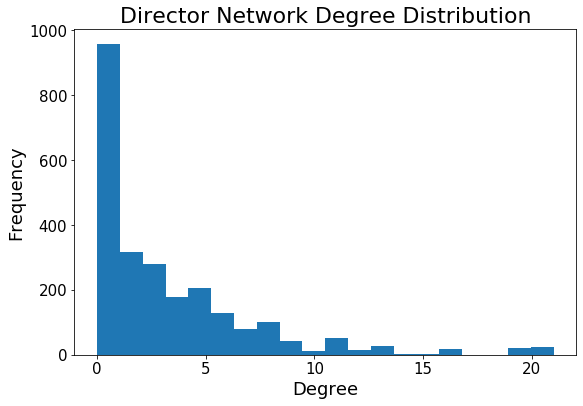

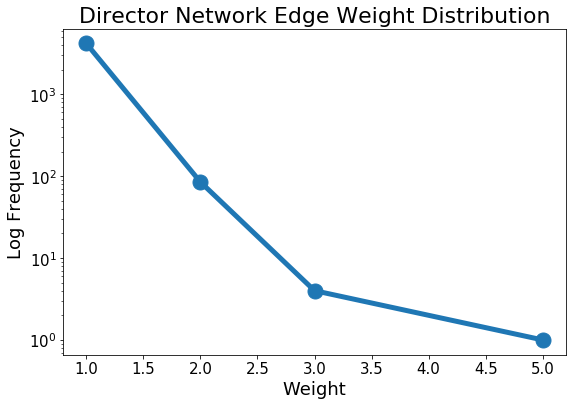

In [91]:
G_genre = 0 # Remove other one from memory
G_director = parse_nodes_edge_file('DirectorG.net')
create_degree_distro(G_director,20,title='Director Network',weights=True)

In [82]:
graph_info(G_director)

Got the largest component...
Got the avg shortest path...


{'n_components': 1045,
 'num_nodes_largest_component': 34,
 'percent_largest_component': 0.013821138211382113,
 'diameter_largest_component': 5,
 'average_shortest_path_largest_component': 2.803921568627451,
 'average_degree': 3.470731707317073,
 'average_clustering_coefficient': 0.6039118641782312}

# Exploratory - shortList Actors Network

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 53, 54, 55, 56, 57, 59, 60, 62, 67, 69, 71, 74, 75, 79, 80, 82, 86, 89, 93, 98, 100, 101, 106, 114, 121, 139, 142, 148, 152, 156, 204, 234, 243, 326, 400]


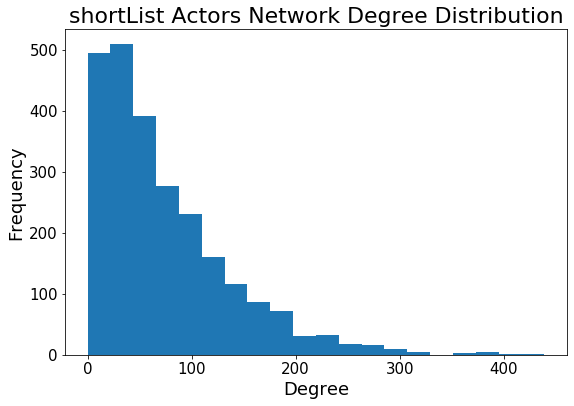

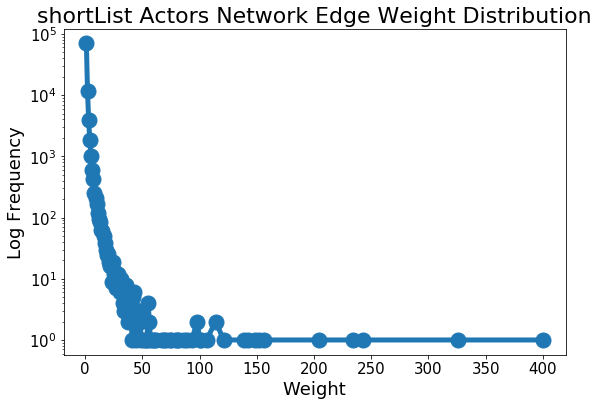

In [92]:
G_director = 0 # Remove other one from memory
G_sactors = parse_nodes_edge_file('shortListActorG.net')
create_degree_distro(G_sactors,20,title='shortList Actors Network',weights=True)

In [84]:
graph_info(G_sactors)

Got the largest component...
Got the avg shortest path...


{'n_components': 8,
 'num_nodes_largest_component': 2453,
 'percent_largest_component': 0.9971544715447155,
 'diameter_largest_component': 6,
 'average_shortest_path_largest_component': 2.393223598762776,
 'average_degree': 73.68780487804878,
 'average_clustering_coefficient': 0.1619055534031273}

# Exploratory - All Actors Network

[1, 2, 3, 4, 5, 6, 7, 8, 9]


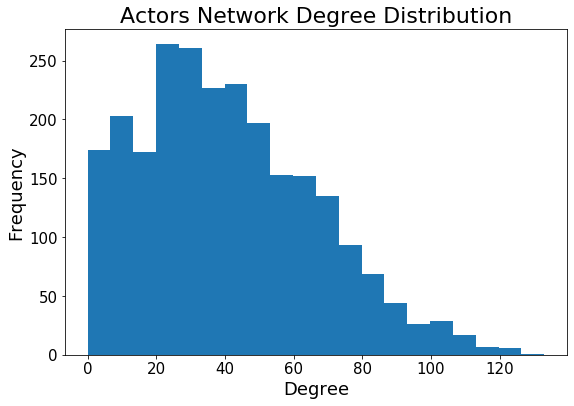

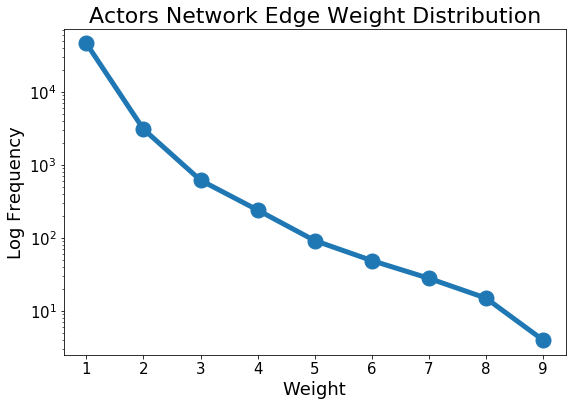

In [93]:
G_sactors = 0 # Remove other one from memory
G_actors = parse_nodes_edge_file('AllActorG.net')
create_degree_distro(G_actors,20,title='Actors Network',weights=True)

In [87]:
graph_info(G_actors)

Got the largest component...
Got the avg shortest path...


{'n_components': 32,
 'num_nodes_largest_component': 2427,
 'percent_largest_component': 0.9865853658536585,
 'diameter_largest_component': 8,
 'average_shortest_path_largest_component': 2.6774735720805136,
 'average_degree': 40.833333333333336,
 'average_clustering_coefficient': 0.29566264033467765}